In [1]:
import numpy as np
import time
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

device = "cuda" if torch.cuda.is_available() else "cpu"

model_name = "gpt2-medium"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

prompt = "Explain KV caching in transformers."

inputs = tokenizer(prompt, return_tensors="pt").to(device)

for use_cache in (True, False):
    times = []
    for _ in range(5):
        start = time.time()
        model.generate(
            **inputs,
            use_cache=use_cache,
            max_new_tokens=1000
        )
        times.append(time.time() - start)

    print(
        f"{'with' if use_cache else 'without'} KV caching: "
        f"{round(np.mean(times), 3)} ± {round(np.std(times), 3)} seconds"
    )


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


with KV caching: 21.694 ± 3.176 seconds


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


without KV caching: 107.393 ± 1.874 seconds


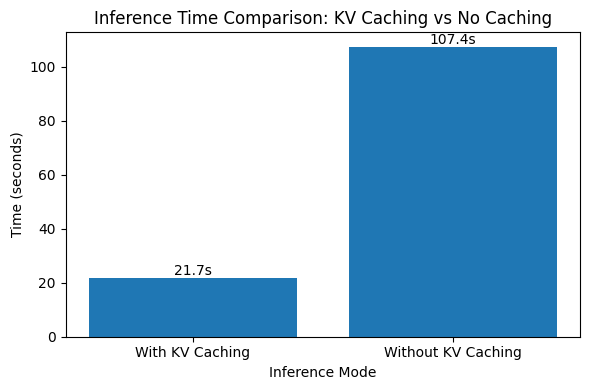

In [2]:
import matplotlib.pyplot as plt

# Timing results
labels = ["With KV Caching", "Without KV Caching"]
times = [21.694, 107.393]

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(labels, times)

plt.title("Inference Time Comparison: KV Caching vs No Caching")
plt.ylabel("Time (seconds)")
plt.xlabel("Inference Mode")

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}s",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()
